# Comparison of the content of the dataset documentation approaches

Before using add the "metadata-elements.xlsx" file in the "inputs" folder (see the README for details)

## Import required packages and set plot settings

In [1]:
import itertools
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sentence_transformers import SentenceTransformer

In [2]:
sns.set(
    font="Franklin Gothic Book",
    rc={
        "axes.axisbelow": False,
        "axes.edgecolor": "lightgrey",
        "axes.facecolor": "None",
        "axes.grid": False,
        "axes.labelcolor": "dimgrey",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.facecolor": "white",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": "dimgrey",
        "xtick.bottom": False,
        "xtick.color": "dimgrey",
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": "dimgrey",
        "ytick.direction": "out",
        "ytick.left": False,
        "ytick.right": False,
    },
)
sns.set_context(
    "notebook", rc={"font.size": 16, "axes.titlesize": 20, "axes.labelsize": 18}
)

colors = ["#073b4c", "#ffd166", "#06d6a0"]
patterns = ["/", "\\", "-", "+", "x", "o", "O", ".", "*", "|"]

## Load data

In [3]:
dfs = pd.read_excel(
    "inputs/dataset/primary/metadata-elements.xlsx", sheet_name=None
)
df_list = dfs["List"]
df_standanding_together = dfs["STANDING Together"]
del dfs["List"]
del dfs["codebook"]
del dfs["STANDING Together"]
display(dfs["Datasheet"])
display(df_list)

,Question or field,Metadata element
0,For what purpose was the dataset created? Was ...,Description of the purpose for creating the da...
1,"Who created the dataset (e.g., which team, res...",Information about the creators of the dataset
2,Who funded the creation of the dataset? If the...,Details about the funding of the dataset
3,Any other comments?,NaN
4,What do the instances that comprise the datase...,Description of the instances included in the d...
...,...,...
61,"Will the dataset be updated (e.g., to correct ...",Description of the dataset update plan
62,"If the dataset relates to people, are there ap...",Description of the dataset retention policy
63,Will older versions of the dataset continue to...,Description of the management plan for older v...
64,If others want to extend/augment/build on/cont...,Description of the methods to contribute to th...


,Metadata element
0,Description of the dataset
1,Information about dataset audit/review
2,Information about the dataset versioning approach
3,Version of the dataset associated with this da...
4,Information about the dataset documentation fo...
...,...
133,Link to design document
134,Description of the relevance of the data
135,Description and results of the requirement tes...
136,Description and results of the adversarial tes...


## Check if any metadata elements are too similar and should be regrouped into one

In [4]:
# Get a list of all metadata elements
metadata_elements_list = []
dict_documentation_metadata = {}
for sheet, df in dfs.items():
    metadata_elements = list(df["Metadata element"])
    metadata_elements = [
        x for x in metadata_elements if str(x) != "nan"
    ]  # remove nan value
    metadata_elements = [
        s.strip() for s in metadata_elements
    ]  # remove spaces ends of string
    metadata_elements = list(set(metadata_elements))  # keep only unique entries
    dict_documentation_metadata[sheet] = metadata_elements
    metadata_elements_list += metadata_elements
    
metadata_elements_list = list(set(metadata_elements_list))  # keep only unique entries

df = pd.DataFrame(metadata_elements_list, columns=["Metadata element"])
# df.to_excel("outputs/metadata_elements_list.xlsx", index=False)
print("There are ", len(metadata_elements_list), " metadata elements")
display(df)

There are  138  metadata elements


,Metadata element
0,Description of the regulation preventing demog...
1,Description and handling of mismatched values
2,Number of subjects represented in the dataset
3,Description of the instances included in the d...
4,Known caveats about the dataset
...,...
133,Description of the ethical review processes
134,Description of the strategies to avoid undesir...
135,Description of the data preprocessing process
136,Information about risks when used with other data


In [5]:
# Encode metadata elements
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(metadata_elements_list)

# Get and save cosine similarity scores
similar_rows = []
unique_index_pairs = list(
    itertools.combinations(list(range(len(metadata_elements_list))), 2)
)
for index_pair in unique_index_pairs:
    i = index_pair[0]
    j = index_pair[1]
    element1 = metadata_elements_list[i]
    element2 = metadata_elements_list[j]
    cosine_similarity = np.dot(embeddings[i], embeddings[j]) / (
        np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j])
    )
    similar_rows.append([element1, element2, cosine_similarity])
df_similar = pd.DataFrame(
    similar_rows, columns=["Element 1", "Element 2", "cosine similarity score"]
)
df_similar = df_similar.sort_values(by="cosine similarity score", ascending=False)
display(df_similar)
df_similar.to_excel("outputs/metadata_elements_similarity.xlsx", index=False)

,Element 1,Element 2,cosine similarity score
3621,Version of the dataset associated with this da...,Information about the dataset documentation fo...,0.954538
3081,Description of the intended use of the dataset,Description of the undesirable uses of the dat...,0.908756
2553,Description of the purpose for creating the da...,Description of the intended use of the dataset,0.896263
2018,Information about the authors of this dataset ...,Information about the dataset documentation fo...,0.877440
1963,Information about the authors of this dataset ...,Version of the dataset associated with this da...,0.868454
...,...,...,...
6156,Link to design document,Description of the dataset retention policy,-0.096966
1031,Recommendations when sampling the dataset,Description of other transformations,-0.099885
6146,Link to design document,Assumption in data fields not made explicit in...,-0.106389
7964,Last update date,Description of the strategies to avoid undesir...,-0.114775


Note: We ran this on the first version of our metadata element assignment where we had 146 unique metadata elements. We manually reviewed each pair of elements in descending order of cosine similarity value. We noticed that below a similarity score of 0.75, the elements were not similar and therefore we did not manually check below that. We identified 8 pairs of metadata elements that could be regrouped into one and ended up with a total of 138 unique metadata elements after that.

## View metadata elements and related questions/fields side-by-side for further review

In [6]:
documentation_list = list(dfs.keys())
retrouped_list = []
for metadata_element in metadata_elements_list:
    dict_questions = {}
    for sheet, df in dfs.items():
        df = df.loc[df["Metadata element"] == metadata_element]
        dict_questions[sheet] = list(df["Question or field"])
    count = 0
    not_all_nan = True
    while not_all_nan:
        row = []
        if count == 0:
            row.append(metadata_element)
        else:
            row.append(math.nan)
        for sheet in documentation_list:
            sheet_list = dict_questions[sheet]
            if len(sheet_list) > count:
                row.append(sheet_list[count])
            else:
                row.append(math.nan)
        if all(i != i for i in row):
            not_all_nan = False
        else:
            retrouped_list.append(row)
        count += 1
df_regrouped = pd.DataFrame(
    retrouped_list, columns=["Metadata element"] + documentation_list
)
display(df_regrouped)
df_regrouped.to_excel(
    "outputs/metadata_elements_regrouped_all_documentation_approaches.xlsx", index=False
)

,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card
0,Description of the regulation preventing demog...,NaN,NaN,NaN,"If no, is there any regulation that prevents d...",NaN
1,Description and handling of mismatched values,NaN,NaN,NaN,NaN,Which fields in the data were corrected for mi...
2,NaN,NaN,NaN,NaN,NaN,How were incorrect or mismatched values cleane...
3,NaN,NaN,NaN,NaN,NaN,Why were incorrect or mismatched values cleane...
4,NaN,NaN,NaN,NaN,NaN,What risks were introduced because of this tra...
...,...,...,...,...,...,...
301,NaN,Is the software used to preprocess/clean/label...,NaN,NaN,Were instances excluded from the dataset at th...,NaN
302,NaN,NaN,NaN,NaN,Is the software used to preprocess/clean/label...,NaN
303,Information about risks when used with other data,NaN,NaN,NaN,NaN,Fill out this row if you selected “Conditional...
304,NaN,NaN,NaN,NaN,NaN,Fill out this row if you selected “Conditional...


## Analysis

### Comparison matrix

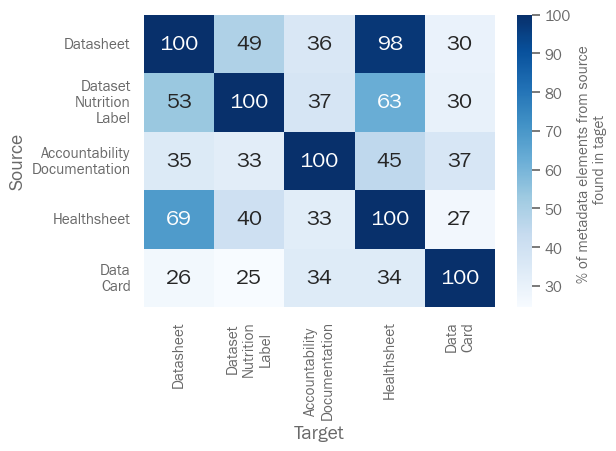

In [8]:
df_comparison = pd.DataFrame(
    index=list(dict_documentation_metadata.keys()), columns=list(dict_documentation_metadata.keys()), dtype=float
)
for documentation1 in df_comparison.index:
    metadata_list_1 = dict_documentation_metadata[documentation1]
    for documentation2 in df_comparison.columns:
        metadata_list_2 = dict_documentation_metadata[documentation2]
        df_comparison.loc[documentation1, documentation2] = (
            len(
                [
                    i
                    for i in metadata_list_1
                    if i in metadata_list_2
                ]
            )
            / len(metadata_list_1)
            * 100
        )

labels = []
for doc in dict_documentation_metadata.keys():
    if len(doc.split()) > 1:
        doc = "\n".join(doc.split())
    labels.append(doc)

df_comparison.to_excel("outputs/metadata_elements_comparison_matrix.xlsx", index=False)
ax = sns.heatmap(
    df_comparison,
    xticklabels=labels,
    yticklabels=labels,
    annot=True,
    cmap="Blues",
    fmt="0.0f",
    cbar_kws={"label": "% of metadata elements from source \n found in taget"},
)
ax.figure.axes[-1].yaxis.label.set_size(11)
ax.set_xlabel("Target", fontsize=14)
ax.set_ylabel("Source", fontsize=14)
plt.tight_layout()
plt.savefig("outputs/metadata_elements_comparison_matrix.png", dpi=200)

### Occurence of metadata elements accross dataset documentation

In [9]:
elements_count_list = []
for metadata_element in metadata_elements_list:
    row = [metadata_element]
    for sheet, df in dfs.items():
        if metadata_element in list(df["Metadata element"]):
            row.append("yes")
        else:
            row.append("no")
    row.append(len([i for i in row if i == "yes"]))
    elements_count_list.append(row)
df_element_count = pd.DataFrame(
    elements_count_list,
    columns=["Metadata element"] + list(dfs.keys()) + ["Count"],
)
df_element_count = df_element_count.sort_values(by=["Count"], ascending=False)
df_element_count.to_excel("outputs/metadata_elements_count.xlsx", index=False)
display(df_element_count)

,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
53,Description of the data collection process,yes,yes,yes,yes,yes,5
24,Description of the intended use of the dataset,yes,yes,yes,yes,yes,5
44,Information about the owners of the dataset,yes,yes,yes,yes,yes,5
114,Dataset publication date,yes,yes,yes,yes,yes,5
98,Description of the dataset update plan,yes,yes,yes,yes,yes,5
...,...,...,...,...,...,...,...
131,Description of domain specific concepts for ge...,no,no,yes,no,no,1
132,Description of the possibilities to identify i...,yes,no,no,no,no,1
134,Description of the strategies to avoid undesir...,no,yes,no,no,no,1
136,Information about risks when used with other data,no,no,no,no,yes,1


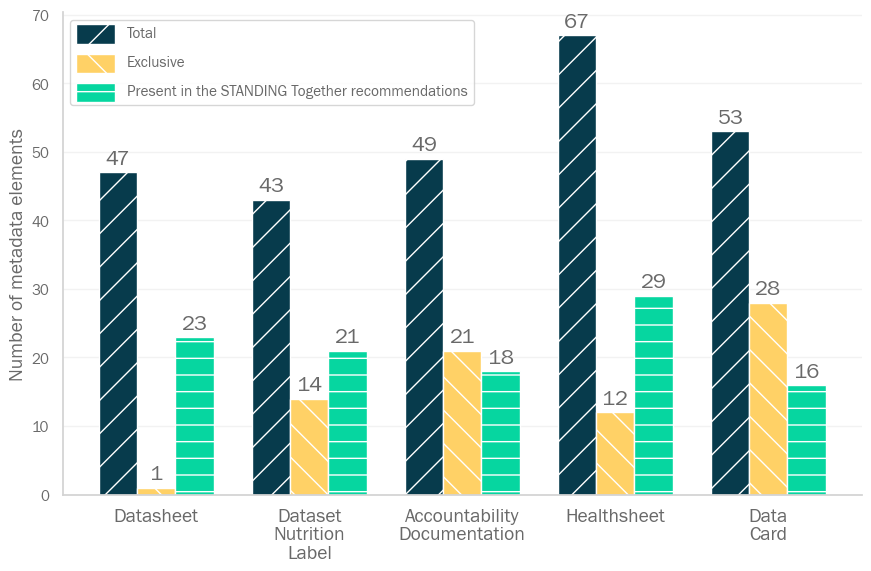

In [10]:
## Number of metadata elements and unique metadata elements per dataset documentation approach
count_metadata_elements = []
count_unique_metadata_elements = []
count_metadata_elements_in_st = []

st_metadata_element_list = list(set(df_standanding_together["Metadata element"]))

labels = []
for doc in list(dfs.keys()):
    count_metadata_elements.append(df_element_count[doc].value_counts().get("yes", 0))
    count_unique_metadata_elements.append(
        len(
            df_element_count[
                (df_element_count[doc] == "yes") & (df_element_count["Count"] == 1)
            ]
        )
    )
    
    list_in_st = [i for i in dict_documentation_metadata[doc] if i in st_metadata_element_list]
    count_metadata_elements_in_st.append(len(list_in_st))
                  
    if len(doc.split()) > 1:
        doc = "\n".join(doc.split())
    labels.append(doc)

# plot
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

width = 0.25
y_list = [
    count_metadata_elements,
    count_unique_metadata_elements,
    count_metadata_elements_in_st
]
labels_list = ["Total", "Exclusive", "Present in the STANDING Together recommendations"]
x = np.arange(len(labels))
count = 0
for y in y_list:
    bars = ax.bar(
        x + width * count,
        y,
        width,
        color=colors[count],
        hatch=patterns[count],
        label=labels_list[count],
    )
    ax.bar_label(bars, padding=3)
    count += 1

ax.set_xticks(x + width, labels, fontsize=14)
ax.set_ylabel("Number of metadata elements", fontsize=14)
ax.set_axisbelow(True)
leg = ax.legend(loc="upper left", labelspacing=1, handlelength=2.5, facecolor="white")
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
plt.grid(color="0.95", axis="y")

fig.tight_layout()
fig.savefig("outputs/metadata_elements_view.png", dpi=200)

In [11]:
df_common = df_element_count[df_element_count["Count"] == 5]
df_unique = df_element_count[df_element_count["Count"] == 1]
print(
    "There are",
    len(df_common),
    "metadata elements that are found in all five documentation approaches",
)
print(
    "There are",
    len(df_unique),
    "metadata elements that are found exclusively in one of the five documentation approaches",
)
display(df_common)

There are 7 metadata elements that are found in all five documentation approaches
There are 76 metadata elements that are found exclusively in one of the five documentation approaches


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
53,Description of the data collection process,yes,yes,yes,yes,yes,5
24,Description of the intended use of the dataset,yes,yes,yes,yes,yes,5
44,Information about the owners of the dataset,yes,yes,yes,yes,yes,5
114,Dataset publication date,yes,yes,yes,yes,yes,5
98,Description of the dataset update plan,yes,yes,yes,yes,yes,5
67,Details about the funding of the dataset,yes,yes,yes,yes,yes,5
47,Description of the dataset sharing method,yes,yes,yes,yes,yes,5


In [12]:
# Least common
for dataset_documentation in dfs.keys():
    print("----- Unique metadata description in " + dataset_documentation + " -----")
    df_unique = df_element_count[
        (df_element_count["Count"] == 1)
        & (df_element_count[dataset_documentation] == "yes")
    ]
    display(df_unique)

----- Unique metadata description in Datasheet -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
132,Description of the possibilities to identify i...,yes,no,no,no,no,1


----- Unique metadata description in Dataset Nutrition Label -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
38,Information about the format/structure of the ...,no,yes,no,no,no,1
28,Keywords,no,yes,no,no,no,1
72,Description of issues related to this dataset,no,yes,no,no,no,1
71,Assumption in data fields not made explicit in...,no,yes,no,no,no,1
60,Description of the involvement of the particip...,no,yes,no,no,no,1
45,Description of the proxy characteristics in th...,no,yes,no,no,no,1
42,Required domain-specific knowledge for proper ...,no,yes,no,no,no,1
49,Information about the metadata repository and ...,no,yes,no,no,no,1
37,Description of representation issues that migh...,no,yes,no,no,no,1
74,Familiarity of creators of this dataset docume...,no,yes,no,no,no,1


----- Unique metadata description in Accountability Documentation -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
4,Known caveats about the dataset,no,no,yes,no,no,1
8,Description of the data rating process,no,no,yes,no,no,1
70,Description and results of other testing,no,no,yes,no,no,1
69,Description of the dataset processing process,no,no,yes,no,no,1
68,Description and results of the requirement tes...,no,no,yes,no,no,1
63,Description of the process for creating this d...,no,no,yes,no,no,1
64,Description of the data distribution in the da...,no,no,yes,no,no,1
61,Description of the data quality measurements,no,no,yes,no,no,1
56,Link to design document,no,no,yes,no,no,1
46,Information about the data collection cost,no,no,yes,no,no,1


----- Unique metadata description in Healthsheet -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
2,Number of subjects represented in the dataset,no,no,no,yes,no,1
0,Description of the regulation preventing demog...,no,no,no,yes,no,1
50,Description of the accessibility measurements,no,no,no,yes,no,1
84,Information about the dataset documentation fo...,no,no,no,yes,no,1
75,Description of the study inclusion criteria,no,no,no,yes,no,1
91,Description of the strategies to avoid reident...,no,no,no,yes,no,1
93,Guidelines for creating new labels,no,no,no,yes,no,1
113,Description of the factors in the data that mi...,no,no,no,yes,no,1
112,Information about the dataset versioning approach,no,no,no,yes,no,1
108,Description of the choice(s) of language for c...,no,no,no,yes,no,1


----- Unique metadata description in Data Card -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count
1,Description and handling of mismatched values,no,no,no,no,yes,1
7,Recommendations when sampling the dataset,no,no,no,no,yes,1
6,Information about the dataset publishers,no,no,no,no,yes,1
41,Description of benefits of the dataset compare...,no,no,no,no,yes,1
36,Description of the prerequisites to access thi...,no,no,no,no,yes,1
40,Description of the dimensionality reduction,no,no,no,no,yes,1
59,Information about the first version of the dat...,no,no,no,no,yes,1
58,Description of the data selection and inclusio...,no,no,no,no,yes,1
51,Recommendations when this data is used with ot...,no,no,no,no,yes,1
57,Description of limitations of the dataset comp...,no,no,no,no,yes,1


### STANDING Together recommendations

In [13]:
# Metadata elements in the ST recommendations 
st_recommendations = list(set(df_standanding_together["Question or field"]))
st_metadata_element_list = list(set(df_standanding_together["Metadata element"]))
len(st_recommendations)
len(st_metadata_element_list)
print("There are", str(len(st_recommendations)), "recommendations for data documentation from the STANDING Together Program")
print("They cover", str(len(st_metadata_element_list)), "unique metadata elements")

There are 18 recommendations for data documentation from the STANDING Together Program
They cover 51 unique metadata elements


In [15]:
### ST metadata elements not found in any metadata
df_st_not_in_doc = df_standanding_together.loc[df_standanding_together["Is in List"] == "no", "Metadata element"]
print("There are", len(df_st_not_in_doc), "metadata elements from the STANDING Together recommendations that are not present in any documentation approaches")
df_st_not_in_doc.to_excel("outputs/metadata_elements_from_st_not_in_any_doc.xlsx", index=False)
display(df_st_not_in_doc)

There are 13 metadata elements from the STANDING Together recommendations that are not present in any documentation approaches


15    Description of adherence to principles for dat...
20          Competing interest amongst dataset creators
23                Reasons for the choice of data origin
29    Description of potential aggregation bias intr...
30             Description of the data shifts over time
40                        Description of synthetic data
43             Description of attempt to mitigiate bias
47    Description of potential bias introduced by th...
48    Description of the data protection laws have b...
51         Description of the governance of the dataset
52    Description of the adherence to principles tha...
54    Description of any efforts to share data and f...
55    Description of formal assessment of bias or so...
Name: Metadata element, dtype: object